## Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Reading Dataset


In [ ]:
df= pl.read_csv('DDos.csv',ignore_errors=True)

## Performing EDA

In [ ]:
df.head()

Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,…,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length_duplicated_0,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,i64,i64,i64,f64,f64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,…,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64,str
54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4e6,666666.6667,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.6667,…,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0,0.0,0,0,0,0,0,0,"""BENIGN"""
55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,110091.7431,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,…,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0,0.0,0,0,0,0,0,0,"""BENIGN"""
55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,230769.2308,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.76923,…,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0,0.0,0,0,0,0,0,0,"""BENIGN"""
46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,352941.1765,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.76471,…,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0,0.0,0,0,0,0,0,0,"""BENIGN"""
54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4e6,666666.6667,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.6667,…,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0,0.0,0,0,0,0,0,0,"""BENIGN"""


* Converting it from polar to pandas

In [ ]:
df= df.to_pandas()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66237 entries, 0 to 66236
Data columns (total 79 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0    Destination Port                66237 non-null  int64  
 1    Flow Duration                   66237 non-null  int64  
 2    Total Fwd Packets               66237 non-null  int64  
 3    Total Backward Packets          66237 non-null  int64  
 4   Total Length of Fwd Packets      66237 non-null  int64  
 5    Total Length of Bwd Packets     66237 non-null  int64  
 6    Fwd Packet Length Max           66237 non-null  int64  
 7    Fwd Packet Length Min           66237 non-null  int64  
 8    Fwd Packet Length Mean          66237 non-null  float64
 9    Fwd Packet Length Std           66237 non-null  float64
 10  Bwd Packet Length Max            66237 non-null  int64  
 11   Bwd Packet Length Min           66237 non-null  int64  
 12   Bwd Packet Length

* Checking Number of rows

In [ ]:
df.shape[0]

66237

* Checking Number of columns

In [ ]:
df.shape[1]

79

In [ ]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

* Removing all the extra spaces

In [ ]:
df.columns= df.columns.str.strip()

In [ ]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

* Checking for null values

In [ ]:
df.isnull().sum()

Destination Port                  0
Flow Duration                     0
Total Fwd Packets                 0
Total Backward Packets            0
Total Length of Fwd Packets       0
                               ... 
Idle Mean                       777
Idle Std                       2255
Idle Max                          1
Idle Min                          1
Label                             1
Length: 79, dtype: int64

* Removing all the null values

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

* As Label is our Target Value, so Checking for unique values in Label column

In [ ]:
df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

* Encoding categorial/object into numberical so that it'll be easy for machine to predict

In [ ]:
le= LabelEncoder()

In [ ]:
df['Label']= le.fit_transform(df['Label'])

* 0:BENIGN & 1:DDoS

In [ ]:
df['Label'].unique()

array([0, 1])

In [ ]:
df.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


* Plotting SNS countplot to check number of O and 1 in the dataset (To check if the dataset is balanced or imbalanced)

Counter({1: 34952, 0: 28982})


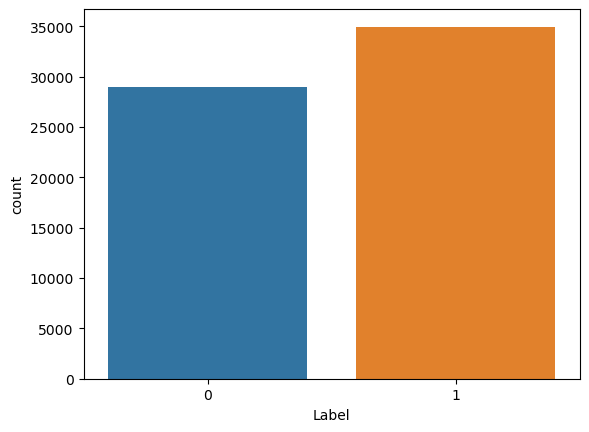

In [ ]:
sns.countplot(x='Label',data=df)
counter=Counter(df['Label'])
print(counter)

* Replacing all inf values will NaN

In [ ]:
df.replace(np.inf, np.nan)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66231,80,78317142,8,5,56,11607,20,0,7.000000,5.656854,...,20.0,15996.0,0.0,15996.0,15996.0,78200000.0,0.0,78200000.0,78200000.0,1
66232,80,48778,3,7,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
66233,80,78359838,8,6,56,11601,20,0,7.000000,5.656854,...,20.0,30018.0,0.0,30018.0,30018.0,78300000.0,0.0,78300000.0,78300000.0,1
66234,80,50518,3,6,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
df.dropna(inplace=True)

In [ ]:
X=df.iloc[:,:-1]

In [ ]:
Y= df.iloc[:,-1]

## Splitting Data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

* Checking if there is any inf or NaN in x_train

In [ ]:
print(np.any(np.isinf(x_train)))
print(np.any(np.isnan(x_train)))

False
False


* Scaling the x_train 

In [ ]:
sc= StandardScaler()

In [ ]:
x_train=sc.fit_transform(x_train)

* Checking if there is any inf or NaN in x_test

In [ ]:
print(np.any(np.isinf(x_test)))
print(np.any(np.isnan(x_test)))

False
False


* Scaling the x_test

In [ ]:
x_test= sc.fit_transform(x_test)

## Model Training

* Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

* Checking all the feature that contribute 

In [ ]:
importances = rf_model.feature_importances_

In [ ]:
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)

In [ ]:
feature_names = [f"Features {i}" for i in indices]

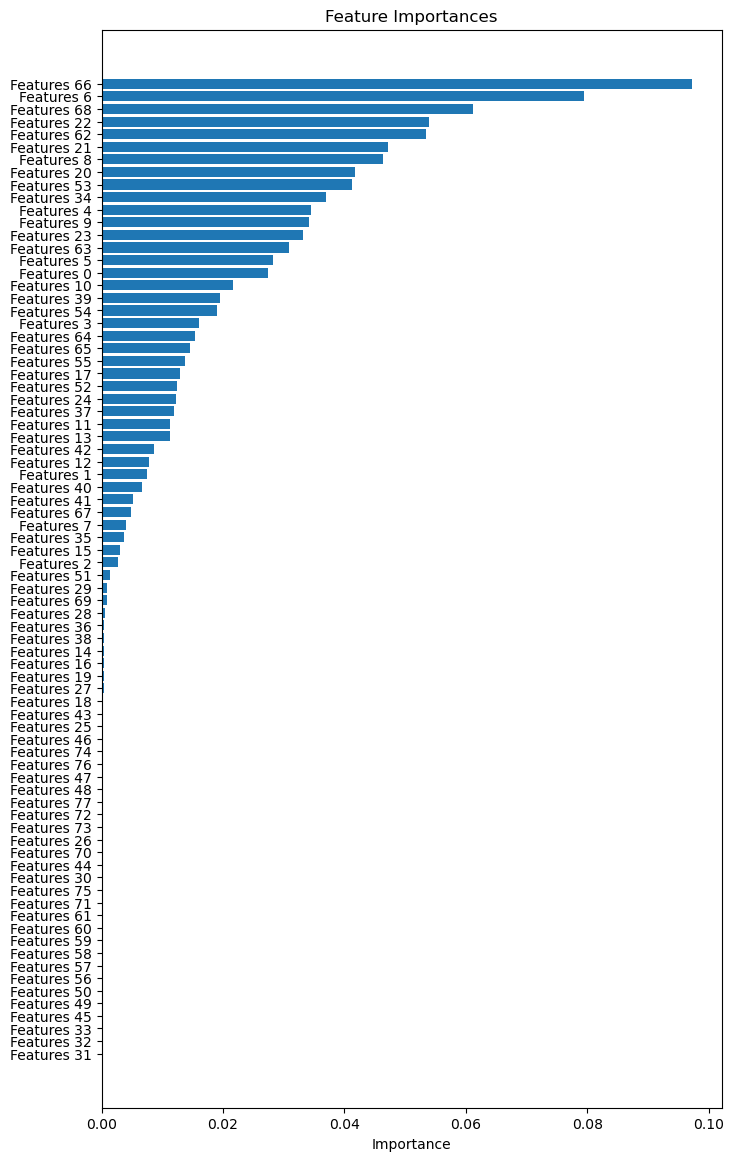

In [ ]:
plt.figure(figsize=(8, 14))
plt.barh(range(x_train.shape[1]), importances[indices], align="center")
plt.yticks(range(x_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

* Confusion Matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

* Performance of Random Forest

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 0.8361
F1 Score: 0.8227
Precision: 1.0000
Recall: 0.6988


In [ ]:
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

[[8743    0]
 [3144 7294]]


* Logistic Regression

In [ ]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Performance of logistic regression

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [ ]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.9953
F1 Score: 0.9957
Precision: 0.9923
Recall: 0.9990


In [ ]:
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')

[[ 8662    81]
 [   10 10428]]


## Data Modeling

In [ ]:
# Random Forest
rf_proba = rf_model.predict_proba(x_test)

# Logistic Regression
lr_proba = lr_model.predict_proba(x_test)

In [ ]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)

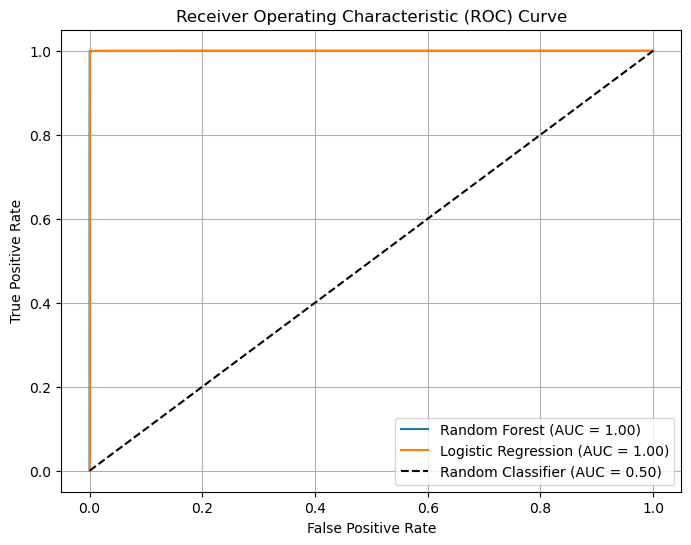

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()